In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('report.csv')

In [3]:
data.head(15)

,Context Limit,Batch Size,Session,Query,Time Taken
0,4K,256,Same Chat,2+2,20 sec
1,4K,256,Same Chat,Fibo,1 min 47 sec
2,4K,256,Same Chat,Hi,4 min 43 sec
3,4K,256,New Chat,Fibo,1 min 40 sec
4,4K,256,New Chat,4/2,1 min 8 sec
5,2K,64,Same Chat,Fibo,30 sec
6,2K,64,Same Chat,Hi,1 min 5 sec
7,2K,64,Same Chat,2+9,5 sec
8,2K,64,Same Chat,Capital,1 min 50 sec
9,16K,64,Same Chat,Fibo,1 min 18 sec


In [4]:
data.shape

(15, 5)

In [5]:
def parse_time(time_str):
    # Convert to string first (to avoid int/float issues)
    time_str = str(time_str).strip()
    parts = time_str.split()
    seconds = 0
    
    if "min" in parts:
        minutes = int(parts[0])
        seconds += minutes * 60
        if "sec" in parts:
            sec_index = parts.index("sec")
            seconds += int(parts[sec_index - 1])
    elif "sec" in parts:
        seconds = int(parts[0])
    else:
        # If it's just a number like "20"
        seconds = int(parts[0])
    
    return seconds

# Apply safely
data["TimeSeconds"] = data["Time Taken"].apply(parse_time)
data.head(15)


,Context Limit,Batch Size,Session,Query,Time Taken,TimeSeconds
0,4K,256,Same Chat,2+2,20 sec,20
1,4K,256,Same Chat,Fibo,1 min 47 sec,107
2,4K,256,Same Chat,Hi,4 min 43 sec,283
3,4K,256,New Chat,Fibo,1 min 40 sec,100
4,4K,256,New Chat,4/2,1 min 8 sec,68
5,2K,64,Same Chat,Fibo,30 sec,30
6,2K,64,Same Chat,Hi,1 min 5 sec,65
7,2K,64,Same Chat,2+9,5 sec,5
8,2K,64,Same Chat,Capital,1 min 50 sec,110
9,16K,64,Same Chat,Fibo,1 min 18 sec,78


In [6]:
avg_times = data.groupby("Context Limit")["TimeSeconds"].mean().reset_index()
print(avg_times)


  Context Limit  TimeSeconds
0           16K    64.333333
1            2K    52.500000
2           32K   176.333333
3            4K   115.600000


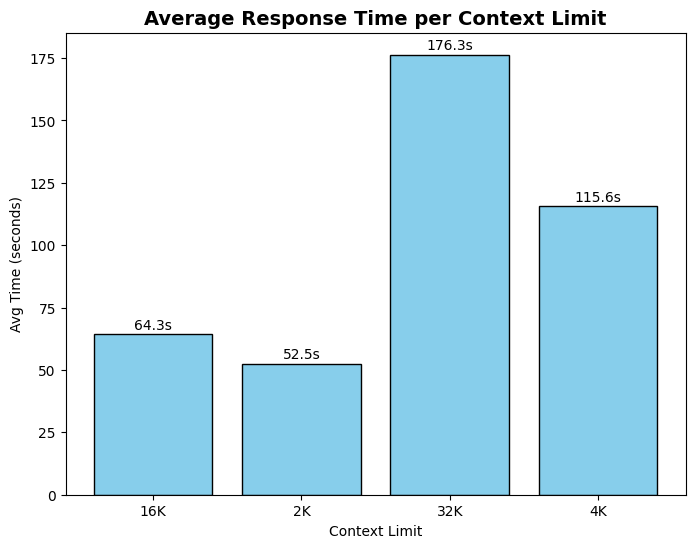

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(avg_times["Context Limit"], avg_times["TimeSeconds"], color="skyblue", edgecolor="black")

plt.title("Average Response Time per Context Limit", fontsize=14, fontweight="bold")
plt.xlabel("Context Limit")
plt.ylabel("Avg Time (seconds)")

# Add numbers on top of bars
for i, val in enumerate(avg_times["TimeSeconds"]):
    plt.text(i, val + 2, f"{val:.1f}s", ha="center", fontsize=10)


plt.savefig("avg_response_time_per_context_limit.png", bbox_inches='tight', dpi=300)
plt.show()

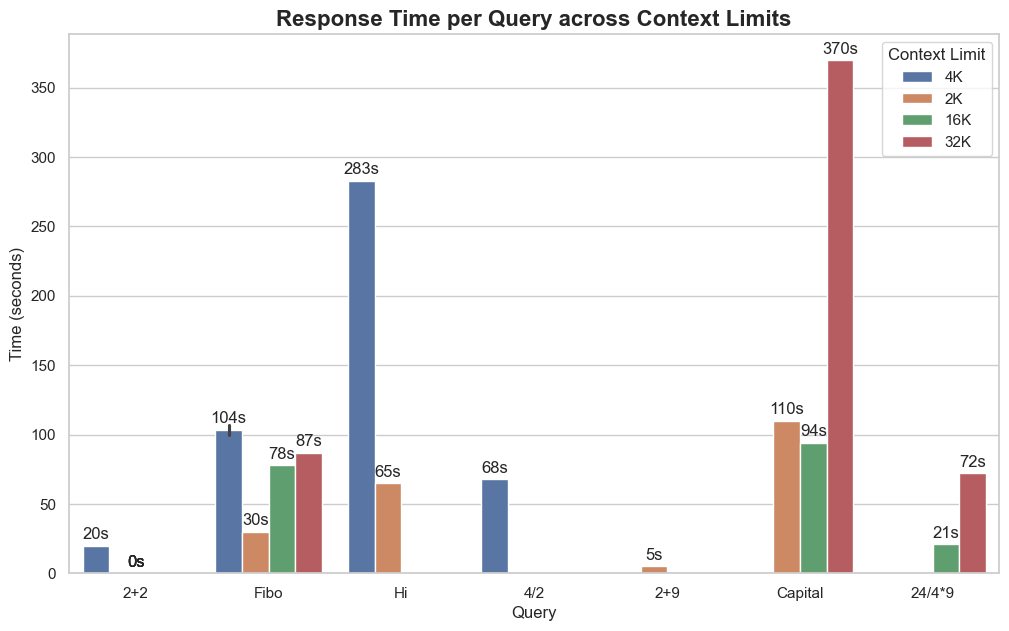

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
sns.set(style="whitegrid")

# --- 1. Context Limit Comparison ---
plt.figure(figsize=(12,7))
sns.barplot(
    data=data,
    x="Query",
    y="TimeSeconds",
    hue="Context Limit"
)

plt.title("Response Time per Query across Context Limits", fontsize=16, fontweight="bold")
plt.ylabel("Time (seconds)")
plt.xlabel("Query")

# Annotate values on top
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f') + "s",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 8),
        textcoords = 'offset points'
    )

plt.legend(title="Context Limit")

plt.savefig("response_time_per_query_context_limit.png", bbox_inches='tight', dpi=300)
plt.show()




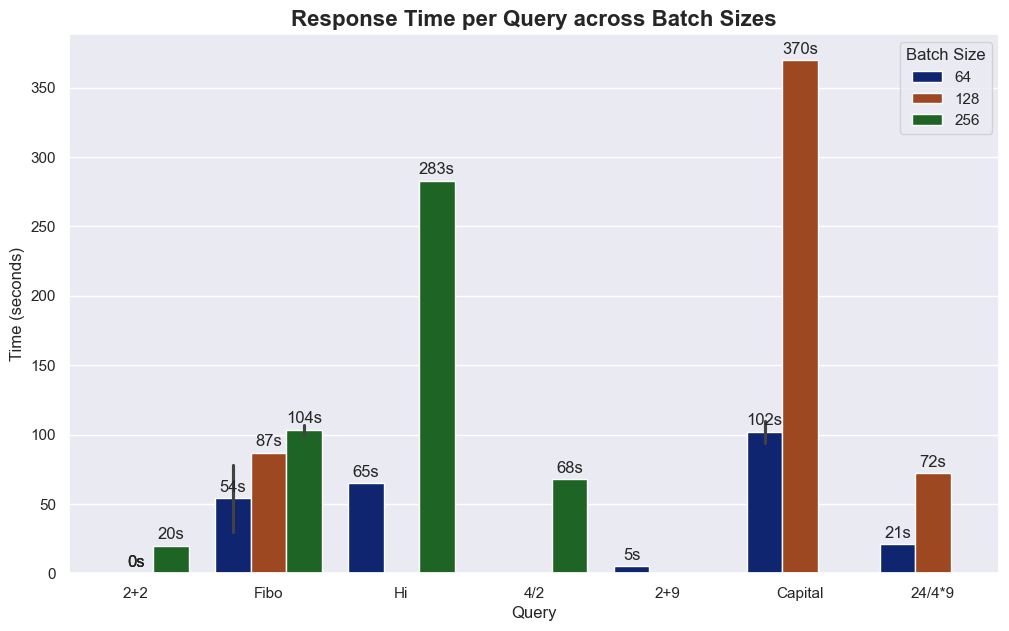

In [9]:
# --- 2. Batch Size Comparison ---
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")  # simple dark style
sns.barplot(
    data=data,
    x="Query",
    y="TimeSeconds",
    hue="Batch Size",
    palette="dark"   # darker colors
)

plt.title("Response Time per Query across Batch Sizes", fontsize=16, fontweight="bold")
plt.ylabel("Time (seconds)")
plt.xlabel("Query")

# Annotate values on top
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), '.0f') + "s",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.legend(title="Batch Size")

plt.savefig("response_time_per_query_batch_size.png", bbox_inches='tight', dpi=300)
plt.show()

## 32K CONTEXT LIMIT REPORT

In [11]:
DATA_32K = pd.read_csv('performance_32k.csv')

In [13]:
DATA_32K.head()

,prompt_id,prompt_text,time_taken_same_chat_sec,time_taken_new_chat_sec,output_length,context_size_tokens,platform,os_version,notes
0,1,Fibonacci series,86,NaN,High,32000,Android,14,Offline model performance (user-provided timings)
1,2,Capital of India,89,93.0,High,32000,Android,14,Offline model performance (user-provided timings)
2,3,24/4*9,40,18.0,High,32000,Android,14,Offline model performance (user-provided timings)
3,4,Diameter of Earth?,14,11.0,Small,32000,Android,14,Offline model performance (user-provided timings)


In [14]:
DATA_32K.shape

(4, 9)

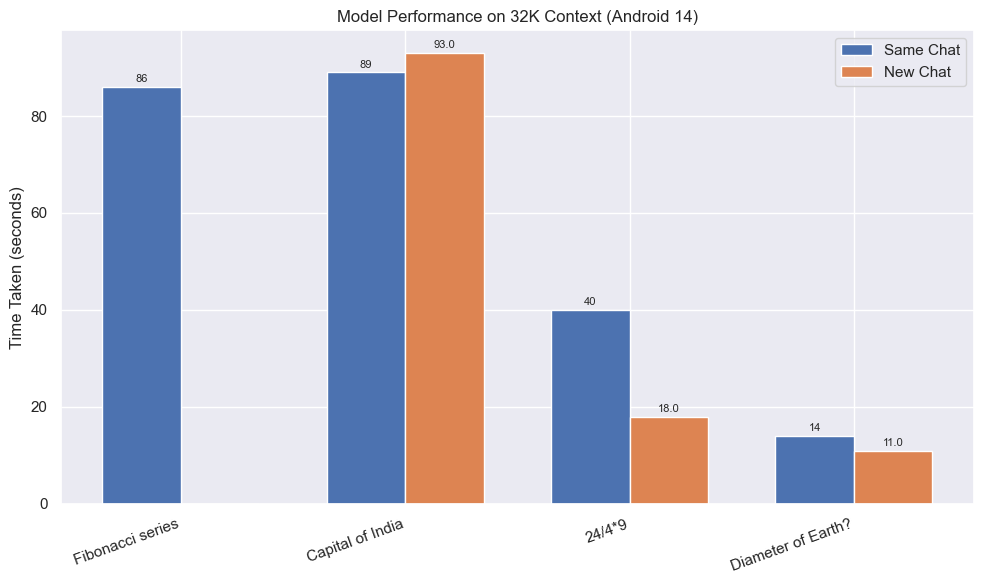

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("performance_32k.csv")

# Plot grouped bar chart (same chat vs new chat)
plt.figure(figsize=(10,6))

bar_width = 0.35
x = range(len(df))

# Bars
plt.bar([i - bar_width/2 for i in x], df["time_taken_same_chat_sec"], 
        width=bar_width, label="Same Chat")
plt.bar([i + bar_width/2 for i in x], df["time_taken_new_chat_sec"].fillna(0), 
        width=bar_width, label="New Chat")

# Labels & Title
plt.xticks(x, df["prompt_text"], rotation=20, ha="right")
plt.ylabel("Time Taken (seconds)")
plt.title("Model Performance on 32K Context (Android 14)")
plt.legend()

# Annotate values
for i, val in enumerate(df["time_taken_same_chat_sec"]):
    plt.text(i - bar_width/2, val + 1, str(val), ha="center", fontsize=8)

for i, val in enumerate(df["time_taken_new_chat_sec"].fillna(0)):
    if val > 0:
        plt.text(i + bar_width/2, val + 1, str(val), ha="center", fontsize=8)

plt.tight_layout()
plt.savefig("performance_32k.png", bbox_inches='tight', dpi=300)
plt.show()
